In [1]:
import pandas as pd
import numpy as np
import matplotlib


In [2]:
dataset = pd.read_csv("dataset.csv") #poor dataset because it contains most very happy datapoints you can see in the bar graph below
permanent = dataset[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
#print(permanent.isnull().sum(),permanent.head())



/home/bharath/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#checking for null values
#check = permanent[permanent["reviews.rating"].isnull()]
#print(len(check))
senti = []
senti = permanent[permanent["reviews.rating"].notnull()]

In [4]:
senti["reviews.rating"] = senti["reviews.rating"].map({5.0:"very happy",4.0:"happy",3.0:"neutral",2.0:"sad",1.0:"very sad"})
print("finished")    

finished


/tmp/ipykernel_8079/3965272512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["reviews.rating"] = senti["reviews.rating"].map({5.0:"very happy",4.0:"happy",3.0:"neutral",2.0:"sad",1.0:"very sad"})


<AxesSubplot:>

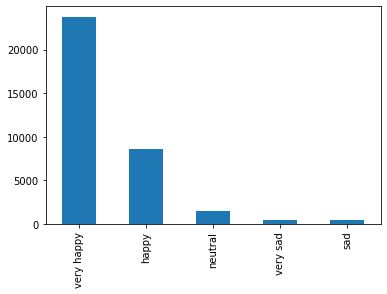

In [5]:
senti["reviews.rating"].value_counts().plot.bar()

In [6]:
#successfully splitted train and test data by the following
train_data = senti[["reviews.text","reviews.rating"]].sample(frac=0.8,random_state=200)
test_data = senti[["reviews.text","reviews.rating"]].drop(train_data.index)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

In [8]:
#linear svm 
vector = TfidfVectorizer(min_df=5,max_df=0.8,sublinear_tf=True,use_idf=True)
train_vector = vector.fit_transform(train_data['reviews.text'].values.astype('U'))
test_vector = vector.transform(test_data['reviews.text'].values.astype('U'))
print("Processing...")
classifier = svm.SVC(kernel="sigmoid")
classifier.fit(train_vector,train_data['reviews.rating'])
print("finished")

Processing...
finished


In [9]:
predict_linear = classifier.predict(test_vector)
report = classification_report(test_data['reviews.rating'],predict_linear,output_dict=True)
print('Very Happy',report['very happy'])
print('Happy',report['happy'])
print('Neutral',report['neutral'])
print('Sad',report['sad'])
print('Very sad',report['very sad'])

Very Happy {'precision': 0.749634443541836, 'recall': 0.9624530663329162, 'f1-score': 0.8428166955886383, 'support': 4794}
Happy {'precision': 0.5160390516039052, 'recall': 0.22195560887822435, 'f1-score': 0.3104026845637584, 'support': 1667}
Neutral {'precision': 0.41935483870967744, 'recall': 0.04452054794520548, 'f1-score': 0.0804953560371517, 'support': 292}
Sad {'precision': 0.5, 'recall': 0.011764705882352941, 'f1-score': 0.02298850574712644, 'support': 85}
Very sad {'precision': 0.45, 'recall': 0.10344827586206896, 'f1-score': 0.16822429906542055, 'support': 87}


In [ ]:
#reviews from users
while(True):
    i = input("Human > ") 
    if i == "bye": break
    testplot = vector.transform([i])
    print(classifier.predict(testplot))


Human >  i am so sad of my delivery


['very happy']
